<a href="https://colab.research.google.com/github/PratikshitSingh/Smart-Tranfer-Learning-for-TSC/blob/main/Transfer%20learning%20implementation/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distance/Similarity measure

In [ ]:
!pip3 install dtaidistance
!pip3 install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 5.5 MB/s eta 0:00:00


In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from dtaidistance import dtw
from tslearn.barycenters import dtw_barycenter_averaging

import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/My Drive/CS598HAN/UCR_TS_Archive_2015/')

In [ ]:
sources = ['Meat/Meat_TRAIN', 'ECGFiveDays/ECGFiveDays_TRAIN', 'InlineSkate/InlineSkate_TRAIN',  'InlineSkate/InlineSkate_TRAIN',                   '50words/50words_TRAIN'] # 'HandOutlines/HandOutlines_TRAIN'
targets = ['Wine/Wine_TRAIN', 'Wine/Wine_TRAIN',                  'Meat/Meat_TRAIN',             'DiatomSizeReduction/DiatomSizeReduction_TRAIN',    'DiatomSizeReduction/DiatomSizeReduction_TRAIN'] # 'ShapeletSim/ShapeletSim_TRAIN'

# Code for generating prototype for each class in a *dataset*

# Dynamic Time Warping (DTW) with DBA
#####https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html

In [ ]:
def DBA(df_source, df_target):

  df_prototype_s = {}
  df_prototype_t = {}

  for i in range(len(df_source)):
    dfs_class                 = df_source.iloc[i].name
    df_prototype_s[dfs_class] = []

  for i in range(len(df_target)):
    dft_class                 = df_target.iloc[i].name
    df_prototype_t[dft_class] = []

  for i in range(len(df_source)):
    dfs                       = df_source.iloc[i]
    dfs_class                 = df_source.iloc[i].name
    df_prototype_s[dfs_class].append(dfs.to_numpy())

  for i in range(len(df_target)):
    dft                       = df_target.iloc[i]
    dft_class                 = df_target.iloc[i].name
    df_prototype_t[dft_class].append(dft.to_numpy())

  source_barycenters  = {}  # len(df_prototype_s)
  target_barycenters  = {}  # len(df_prototype_t)

  for c in (df_prototype_s.keys()):
    source_barycenters[c] = dtw_barycenter_averaging(df_prototype_s[c])

  for c in (df_prototype_t.keys()):
    target_barycenters[c] = dtw_barycenter_averaging(df_prototype_t[c])

  min_dtw = float("inf")
  min_class = ()

  for i, source_barycenter in source_barycenters.items():
    for j, target_barycenter in target_barycenters.items():
      # Calculate DTW distance
      dtw_distance = dtw.distance(source_barycenter, target_barycenter)

      # Update minimum DTW distance and corresponding class if necessary
      if dtw_distance < min_dtw:
          min_dtw = dtw_distance
          min_class = (i, j)
  print("Most similar class(source-target): ", min_class)
  print("Minimum distance between them: ", min_dtw)
  print("\n")

## Randomly chosen source and target dataset similarity measurement

---


In [ ]:
for s, t in zip(sources, targets):
  print(s, '-', t)
  df_source = read_csv(s, header=None, index_col=0)
  df_target = read_csv(t, header=None, index_col=0)
  DBA(df_source, df_target)

## Interesting source-target pairs (with reasons for their selection)
---



1. RefrigerationDevices -> ShapeletSim (small size of training set)
2. 50words -> HandOutliers (Relatedness to shapelets)
3. WordsSynonyms -> HandOutliers (Relatedness to shapelets)
4. Strawberry -> Meat (transfer learning accuracy variation)
5. Beef -> Meat (transfer learning accuracy variation)




In [ ]:
df_source = read_csv('RefrigerationDevices/RefrigerationDevices_TRAIN', header=None, index_col=0)
df_target = read_csv('ShapeletSim/ShapeletSim_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

Most similar class(source-target):  (1, 1)
Minimum distance between them:  12.555812838330903


In [ ]:
df_source = read_csv('Car/Car_TRAIN', header=None, index_col=0)
df_target = read_csv('ShapeletSim/ShapeletSim_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

Most similar class(source-target):  (2, 1)
Minimum distance between them:  16.738063197450185




Caution - Do not run: Memory crash

In [ ]:
df_source = read_csv('50words/50words_TRAIN', header=None, index_col=0)
df_target = read_csv('HandOutlines/HandOutlines_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

In [ ]:
df_source = read_csv('WordsSynonyms/WordsSynonyms_TRAIN', header=None, index_col=0)
df_target = read_csv('HandOutlines/HandOutlines_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

In [ ]:
df_source = read_csv('Strawberry/Strawberry_TRAIN', header=None, index_col=0)
df_target = read_csv('Meat/Meat_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

Most similar class(source-target):  (2, 3)
Minimum distance between them:  2.1764866573784327




Beef -> Meat

In [ ]:
df_source = read_csv('Beef/Beef_TRAIN', header=None, index_col=0)
df_target = read_csv('Meat/Meat_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

# Checking if our measure is symmetric
df_source = read_csv('Meat/Meat_TRAIN', header=None, index_col=0)
df_target = read_csv('Beef/Beef_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

Most similar class(source-target):  (3, 1)
Minimum distance between them:  3.738592244173742


Most similar class(source-target):  (1, 3)
Minimum distance between them:  3.738592244173742




RefrigerationDevices -> ShapeletSim

In [ ]:
df_source = read_csv('RefrigerationDevices/RefrigerationDevices_TRAIN', header=None, index_col=0)
df_target = read_csv('ShapeletSim/ShapeletSim_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

# Checking if our measure is symmetric
df_source = read_csv('ShapeletSim/ShapeletSim_TRAIN', header=None, index_col=0)
df_target = read_csv('RefrigerationDevices/RefrigerationDevices_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

Most similar class(source-target):  (1, 1)
Minimum distance between them:  12.555812838330903


Most similar class(source-target):  (1, 1)
Minimum distance between them:  12.555812838330903





*   Closest NN to DiatomSizeReduction = ShapesAll
*   ShapesAll -> DiatomSizeReduction



In [ ]:
df_source = read_csv('ShapesAll/ShapesAll_TRAIN', header=None, index_col=0)
df_target = read_csv('DiatomSizeReduction/DiatomSizeReduction_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

Most similar class(source-target):  (58, 3)
Minimum distance between them:  0.3778433263677064





*   2nd NN to DiatomSizeReduction = Adiac
*   Adiac -> DiatomSizeReduction



In [ ]:
df_source = read_csv('Adiac/Adiac_TRAIN', header=None, index_col=0)
df_target = read_csv('DiatomSizeReduction/DiatomSizeReduction_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

Most similar class(source-target):  (22, 3)
Minimum distance between them:  0.4045909598388119






*   Closest NN to Wine = Beef
*   Beef -> Wine



In [ ]:
df_source = read_csv('Beef/Beef_TRAIN', header=None, index_col=0)
df_target = read_csv('Wine/Wine_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

Most similar class(source-target):  (4, 1)
Minimum distance between them:  5.365530898885693





*   2nd NN to Wine = uWaveGestureLibrary_Y
*   uWaveGestureLibrary_Y -> Wine



In [ ]:
df_source = read_csv('UWaveGestureLibraryAll/UWaveGestureLibraryAll_TRAIN', header=None, index_col=0)
df_target = read_csv('Wine/Wine_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

Most similar class(source-target):  (5, 1)
Minimum distance between them:  9.278547087494417




MALLAT -> OliveOil

In [ ]:
df_source = read_csv('MALLAT/MALLAT_TRAIN', header=None, index_col=0)
df_target = read_csv('OliveOil/OliveOil_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

Most similar class(source-target):  (2, 4)
Minimum distance between them:  7.663162224759364




FaceFour -> OliveOil

In [ ]:
df_source = read_csv('FaceFour/FaceFour_TRAIN', header=None, index_col=0)
df_target = read_csv('OliveOil/OliveOil_TRAIN', header=None, index_col=0)
DBA(df_source, df_target)

Most similar class(source-target):  (2, 4)
Minimum distance between them:  12.983800330293818




# Visualization

### With all time series

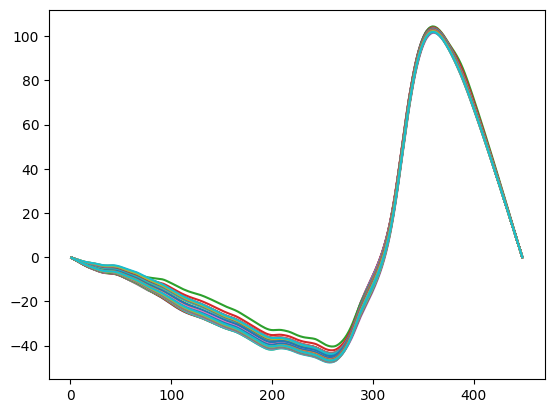

In [ ]:
for i in range(len(df_source)):
    ts                = df_source.iloc[i]
    ts                = ts.cumsum()
    ts.plot()

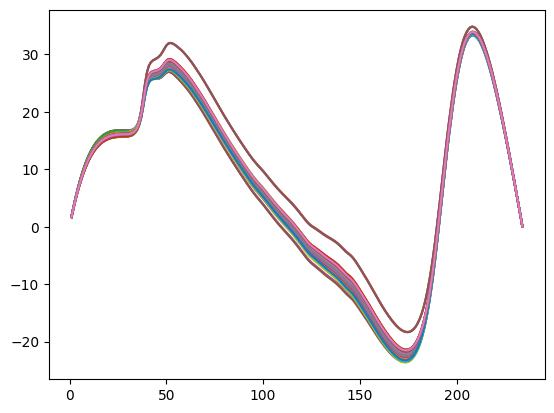

In [ ]:
for i in range(len(df_target)):
    ts                = df_target.iloc[i]
    ts                = ts.cumsum()
    ts.plot()

### With prototypes

In [ ]:
def generate_prototype(df_source, df_target):
  '''Returns the source and target Barycenters'''
  df_prototype_s = {}
  df_prototype_t = {}

  for i in range(len(df_source)):
    dfs_class                 = df_source.iloc[i].name
    df_prototype_s[dfs_class] = []

  for i in range(len(df_target)):
    dft_class                 = df_target.iloc[i].name
    df_prototype_t[dft_class] = []

  for i in range(len(df_source)):
    dfs                       = df_source.iloc[i]
    dfs_class                 = df_source.iloc[i].name
    df_prototype_s[dfs_class].append(dfs.to_numpy())

  for i in range(len(df_target)):
    dft                       = df_target.iloc[i]
    dft_class                 = df_target.iloc[i].name
    df_prototype_t[dft_class].append(dft.to_numpy())

  source_barycenters  = {}  # len(df_prototype_s)
  target_barycenters  = {}  # len(df_prototype_t)

  for c in (df_prototype_s.keys()):
    source_barycenters[c] = dtw_barycenter_averaging(df_prototype_s[c])

  for c in (df_prototype_t.keys()):
    target_barycenters[c] = dtw_barycenter_averaging(df_prototype_t[c])

  return source_barycenters, target_barycenters

In [ ]:
df_source = read_csv('Beef/Beef_TRAIN', header=None, index_col=0)
df_target = read_csv('Wine/Wine_TRAIN', header=None, index_col=0)
source_barycenters, target_barycenters = generate_prototype(df_source, df_target)

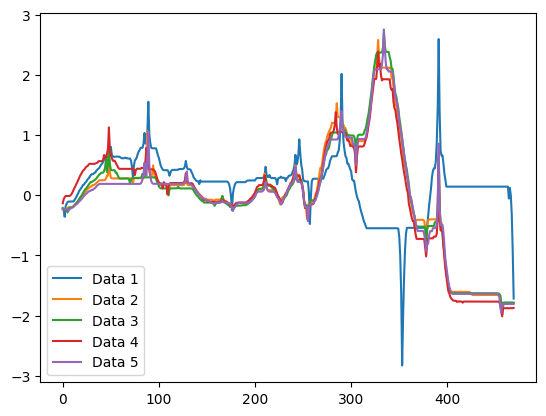

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for key, value in source_barycenters.items():
    ax.plot(value, label=f"Data {key}")
ax.legend()
plt.show()

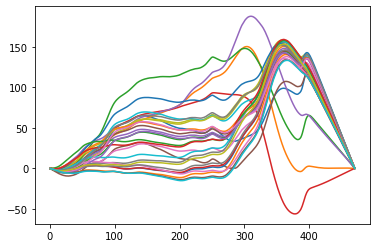

In [ ]:
for i in range(len(df_source)):
    ts                = df_source.iloc[i]
    ts                = ts.cumsum()
    ts.plot()

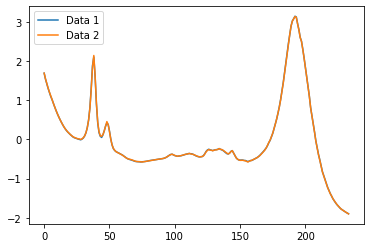

In [ ]:
fig, ax = plt.subplots()
for key, value in target_barycenters.items():
    ax.plot(value, label=f"Data {key}")
ax.legend()
plt.show()

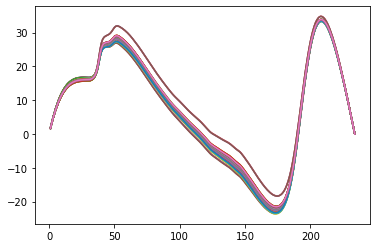

In [ ]:
for i in range(len(df_target)):
    ts                = df_target.iloc[i]
    ts                = ts.cumsum()
    ts.plot()

# CNN model implementation

In [ ]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import read_csv

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, ConcatDataset

import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt

import copy
from tqdm.auto import tqdm

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir('/content/drive/My Drive/CS598HAN/UCR_TS_Archive_2015/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pwd

/content/drive/My Drive/CS598HAN/UCR_TS_Archive_2015




*   Each batch is a collection of time series (x_train[0]) and their classes (y_train[0]).
*   x_train, y_train: coleection of batches(16)

*   x_train[0], y_train[0]: first batch

In [ ]:
class CNN(nn.Module):
  def __init__(self, lr, input_shape, nb_classes):
    super(CNN, self).__init__()

    self.conv1  = nn.Conv1d(in_channels=input_shape[0], out_channels=128, kernel_size=8, padding='same')
    self.bn1    = nn.BatchNorm1d(128)
    self.relu1  = nn.ReLU()

    self.conv2  = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5, padding='same')
    self.bn2    = nn.BatchNorm1d(256)
    self.relu2  = nn.ReLU()

    self.conv3  = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, padding='same')
    self.bn3    = nn.BatchNorm1d(128)
    self.relu3  = nn.ReLU()

    self.gap_layer    = nn.AdaptiveAvgPool1d(1)
    self.output_layer = nn.Linear(in_features=128, out_features=nb_classes)

    self.criterion   = nn.CrossEntropyLoss()
    self.optimizer   = torch.optim.Adam(self.parameters(), lr=lr, amsgrad=True)

  def forward(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu1(x)

    x = self.conv2(x)
    x = self.bn2(x)
    x = self.relu2(x)

    x = self.conv3(x)
    x = self.bn3(x)
    x = self.relu3(x)

    x = self.gap_layer(x).squeeze()
    x = self.output_layer(x)

    return x

  def step(self, x, y):
    self.optimizer.zero_grad()
    # reshape X so that input size is compatible for conv layer?
    y_hat     = self(x)
    criterion = self.criterion
    loss      = criterion(y_hat, y)

    loss.backward()
    self.optimizer.step()

    return loss.item()

In [ ]:
def train_model(model, x_train, y_train, epochs):
  accuracies  = []
  model       = model.to(device)
  losses      = []

  for epoch in tqdm(range(epochs)):
    print("\rEpoch {}".format(epoch), end="")
    epoch_loss = 0.0
      
    for batch_x, batch_y in zip(x_train, y_train):
      # To make classes start from 0
      batch_y     = batch_y - 1

      batch_x     = batch_x.to(device)
      batch_y     = batch_y.to(device)

      batch_loss = model.step(batch_x, batch_y)

      epoch_loss += batch_loss
    losses.append(epoch_loss)
    print("\rEpoch {} Loss {}".format(epoch, epoch_loss), end="")
    
  return losses, model

In [ ]:
# Data loader function
def data_loader_ucr(data, batch_size, test=False):
  d = data.to_numpy()
  np.random.shuffle(d)
  if test==True:
    new_batch_size = batch_size
  else:
    new_batch_size = batch_size #int(min(d.shape[0]/10, batch_size))
  cols = range(1, d.shape[1])
  y = d[:, [0]]
  x = d[:, cols]
  nb_classes = np.unique(y)
  if len(x.shape) == 2:  # if univariate
		# add a dimension to make it multivariate with one dimension
    x_new = x.reshape((x.shape[0], x.shape[1], 1))
    x_train, y_train = np.array_split(x_new, new_batch_size, axis=0), np.array_split(y, new_batch_size, axis=0) 
  else:
    x_train, y_train = np.array_split(x_new, new_batch_size, axis=0), np.array_split(y, new_batch_size, axis=0)

  x_train     = [torch.from_numpy(item).float() for item in x_train]
  y_train     = [(torch.from_numpy(item).flatten()).type(torch.LongTensor) for item in y_train]

  return x_train, y_train, new_batch_size, nb_classes

In [ ]:
# source dataset - Simran
data = read_csv('UWaveGestureLibraryAll/UWaveGestureLibraryAll_TRAIN', header=None)
x_train, y_train, batch_size, nb_classes = data_loader_ucr(data, 16)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,936,937,938,939,940,941,942,943,944,945
0,6,-0.31250,-0.31250,-0.31250,-0.31250,-0.31250,-0.31250,-0.31250,-0.31250,-0.31250,...,0.51219,0.50300,0.49252,0.482050,0.46366,0.44528,0.42689,0.40851,0.39013,0.37175
1,5,1.62970,1.62970,1.62970,1.62970,1.62970,1.62970,1.62970,1.62970,1.62970,...,-0.42425,-0.42425,-0.42425,-0.424410,-0.42601,-0.43796,-0.44990,-0.46185,-0.47379,-0.48574
2,5,0.66541,0.66541,0.66541,0.66541,0.66541,0.66541,0.66541,0.66541,0.66541,...,-0.85689,-0.85689,-0.85689,-0.856890,-0.85689,-0.85689,-0.85689,-0.85689,-0.85689,-0.85689
3,3,0.16489,0.16489,0.16489,0.16489,0.16489,0.16489,0.16489,0.16489,0.16489,...,-0.19475,-0.13101,-0.28657,0.051284,0.38914,0.14914,0.24567,0.43713,0.63984,0.84255
4,4,1.27250,1.27250,1.27250,1.27250,1.27250,1.27250,1.27250,1.27250,1.27250,...,1.85240,1.81930,1.74120,1.624100,1.50690,1.43920,1.50100,1.61810,1.73530,1.85240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,3,0.12606,0.12606,0.12606,0.12606,0.12606,0.12606,0.12606,0.12606,0.12606,...,-0.20282,-0.12824,-0.32171,-0.044231,0.14222,0.32867,0.11003,0.14732,0.18461,0.22190
892,1,-1.23230,-1.23230,-1.23230,-1.23230,-1.23230,-1.23230,-1.23230,-1.23230,-1.23230,...,0.22168,0.23388,0.24607,0.258260,0.27046,0.28265,0.29484,0.30704,0.31923,0.33142
893,2,0.28510,0.28510,0.28510,0.28510,0.28510,0.28510,0.28510,0.28510,0.28510,...,-0.21908,-0.21316,-0.18713,0.176420,0.13835,0.19837,0.44633,0.16122,0.22572,0.27010
894,7,1.25140,1.25140,1.25140,1.25140,1.25140,1.25140,1.25140,1.25140,1.25140,...,-0.15540,-0.15819,-0.18551,-0.291490,-0.40197,-0.49932,-0.55389,-0.54401,-0.50064,-0.42788


In [ ]:
x_train[0].shape

torch.Size([56, 945, 1])

In [ ]:
# Number of batches for source dataet
print(len(x_train))

# batch size in the source dataet
print(len(x_train[0]))

# length of a time series in the source dataet
print(len(x_train[0][0]))

16
56
945


In [ ]:
nb_classes

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [ ]:
nb_epochs   = 2000
lr          = 1e-4
verbose     = False
input_shape = (len(x_train[0][0]), 1)
nb_classes  = len(nb_classes)

In [ ]:
model = CNN(lr, input_shape, nb_classes)

loss, trained_model = train_model(model, x_train, y_train, nb_epochs)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/conv.py:309: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1003.)
  return F.conv1d(input, weight, bias, self.stride,


Epoch 999

In [ ]:
loss

[22.241171777248383,
 11.922850549221039,
 8.840381056070328,
 7.244059979915619,
 6.208936154842377,
 5.426944777369499,
 4.8017967492341995,
 4.28549288213253,
 3.8466404527425766,
 3.472497373819351,
 3.1484675258398056,
 2.8636563420295715,
 2.6164212599396706,
 2.3956735357642174,
 2.191468797624111,
 2.013313412666321,
 1.8547434657812119,
 1.7125960886478424,
 1.5843953490257263,
 1.4712345749139786,
 1.3707180321216583,
 1.2773660942912102,
 1.1944442801177502,
 1.1222485341131687,
 1.0543996132910252,
 0.9918994307518005,
 0.9367137476801872,
 0.8849858194589615,
 0.8383214883506298,
 0.7968999743461609,
 0.7580599002540112,
 0.721101276576519,
 0.6874547004699707,
 0.6567039638757706,
 0.6279202327132225,
 0.601026264950633,
 0.5757123585790396,
 0.5527845341712236,
 0.5308642294257879,
 0.5103171989321709,
 0.4914010502398014,
 0.4734560623764992,
 0.4565843418240547,
 0.4405683893710375,
 0.4256841894239187,
 0.4113557320088148,
 0.39791335351765156,
 0.3852817751467228,
 0

In [ ]:
torch.save(trained_model.state_dict(), "../transfer_model_src.pth")

In [ ]:
#trained_model = model.load_state_dict(torch.load("../transfer_model_src.pth"))

## Finetuning/Transfering the model to target dataset

In [ ]:
# target dataset - Simran
data = read_csv('Wine/Wine_TRAIN', header=None)
x_train, y_train, batch_size, nb_classes = data_loader_ucr(data, 16)

nb_classes_target = len(nb_classes)

In [ ]:
# Number of batches for target dataet
print(len(x_train))

# batch size in the target dataet
print(len(x_train[0]))

# length of a time series in the target dataet
print(len(x_train[0][0]))

16
4
234


In [ ]:
input_shape = (len(x_train[0][0]), 1)
print(input_shape)

(234, 1)


In [ ]:
trained_model.output_layer.in_features

128

In [ ]:
num_ftrs                    = trained_model.output_layer.in_features
trained_model.conv1         = nn.Conv1d(in_channels=input_shape[0], out_channels=128, kernel_size=8, padding='same')
trained_model.output_layer  = nn.Sequential(
                                nn.Linear(num_ftrs, nb_classes_target),
                                nn.Softmax(dim=1)
                              )

In [ ]:
batch_size  = 16
nb_epochs   = 50
lr          = 1e-4
verbose     = False

loss, transfer_model = train_model(trained_model, x_train, y_train, nb_epochs)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 24

In [ ]:
torch.save(transfer_model.state_dict(), "../finetuned_model.pth")

# Testing on target dataset

In [ ]:
data = read_csv('Wine/Wine_TEST', header=None)

In [ ]:
x_test = data.loc[:,1:]
y_test = data.loc[:,:0]

In [ ]:
x_test.shape

(54, 234)

In [ ]:
y_test.shape

(54, 1)

In [ ]:
x_test, y_test, batch_size, nb_classes = data_loader_ucr(data, 1)

In [ ]:
len(x_test)

1

In [ ]:
x_test[0].shape

torch.Size([54, 234, 1])

In [ ]:
x_test  = x_test[0]
x_test  = x_test.to(device)

y_test  = y_test[0]
y_test  = y_test - 1
y_test  = y_test.to(device)

In [ ]:
with torch.no_grad():
  transfer_model.eval()

  y_pred    = transfer_model(x_test)
  test_loss = transfer_model.criterion(y_pred, y_test)
  print('test loss is {}'.format(test_loss))

test loss is 0.6213982701301575
